<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-5-7pm/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification with CNN
Convolutional Neural Network

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step1- Load the dataset from keras - Handwritten Digits dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [7]:
xtrain[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

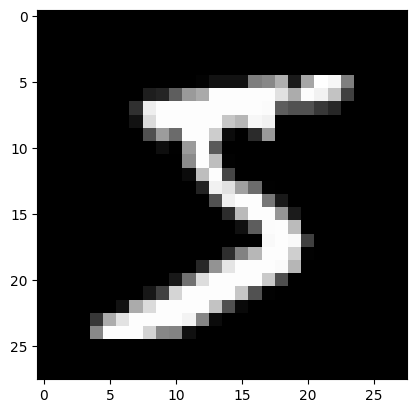

In [9]:
plt.imshow(xtrain[0],cmap="gray")
plt.show()

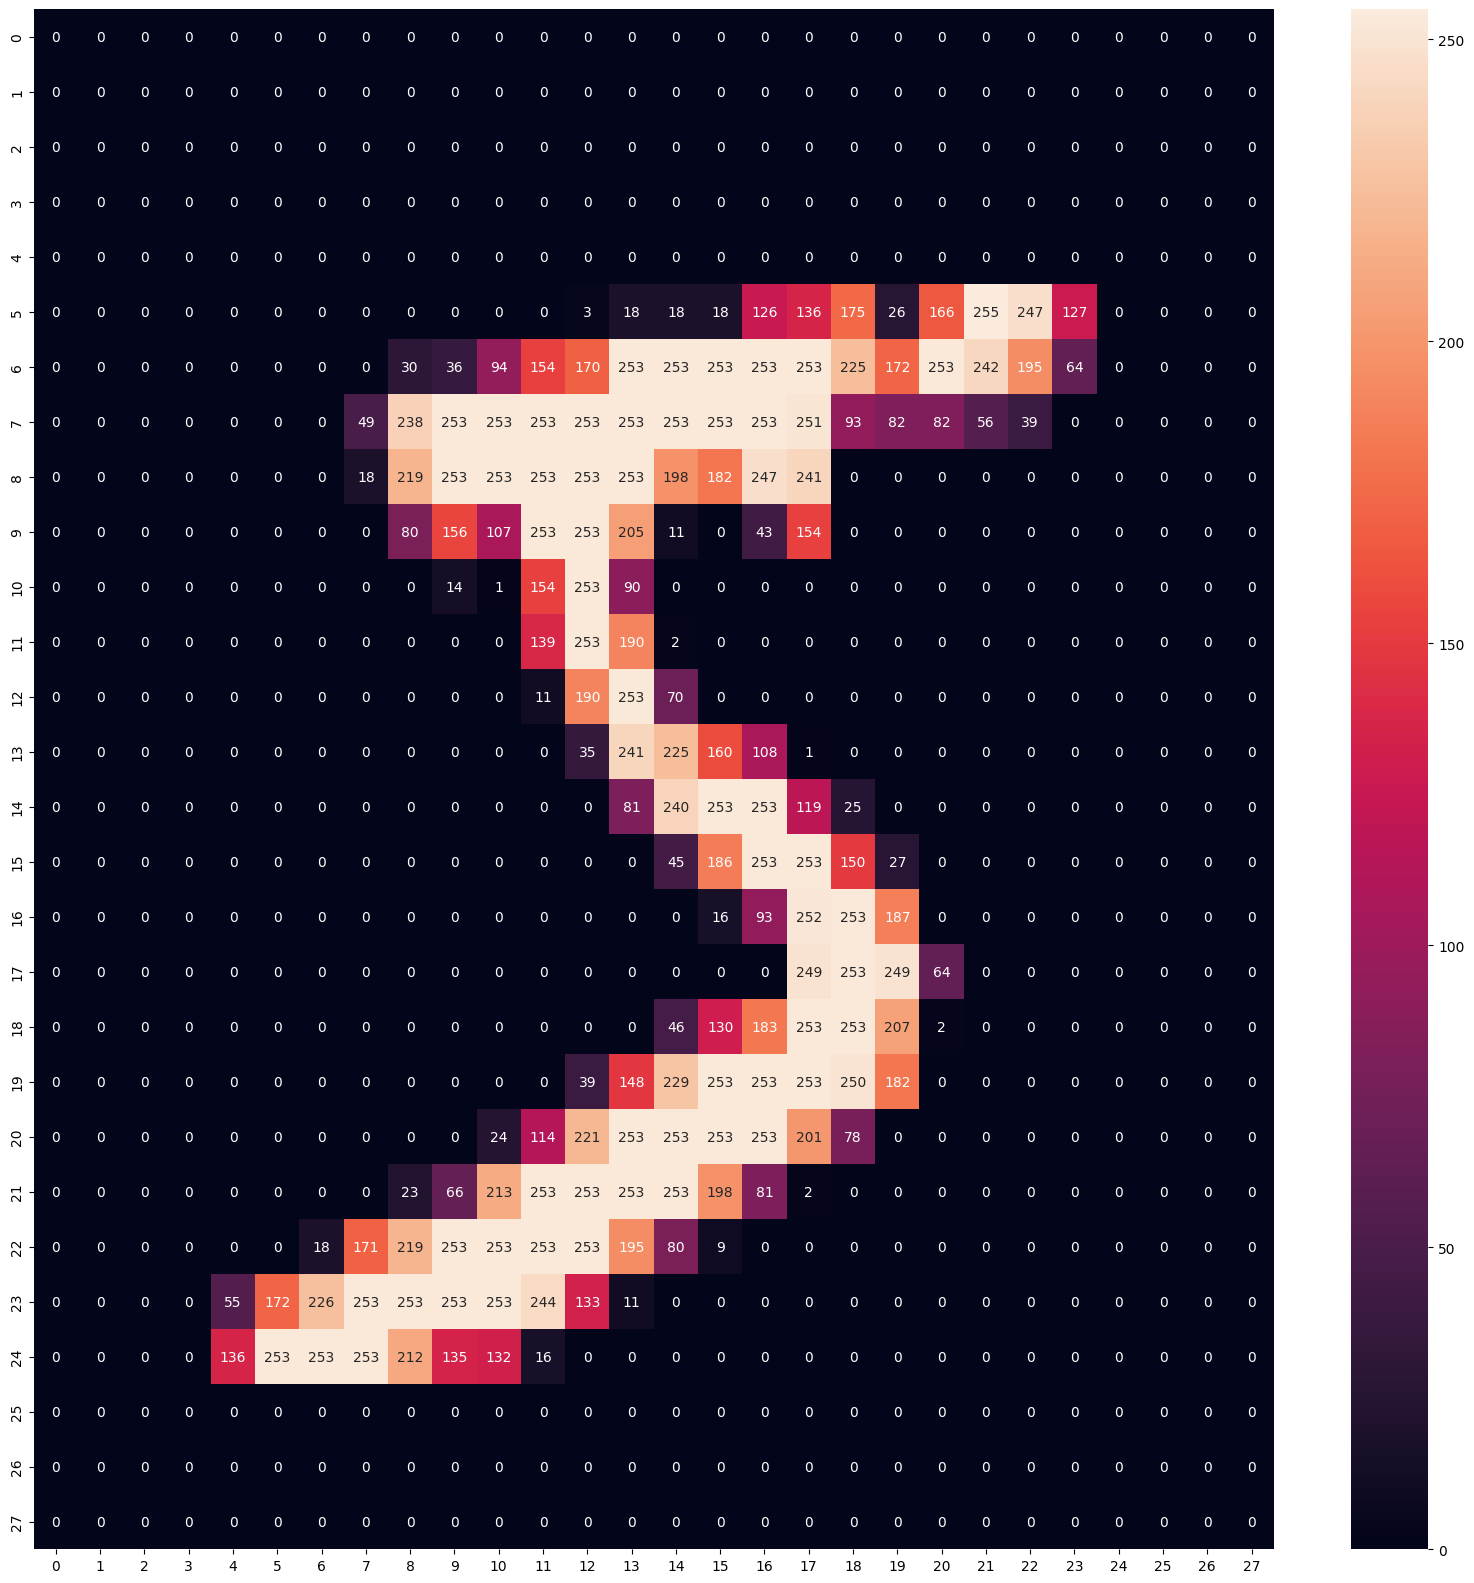

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

## Visualize first 9 images from train data

In [11]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

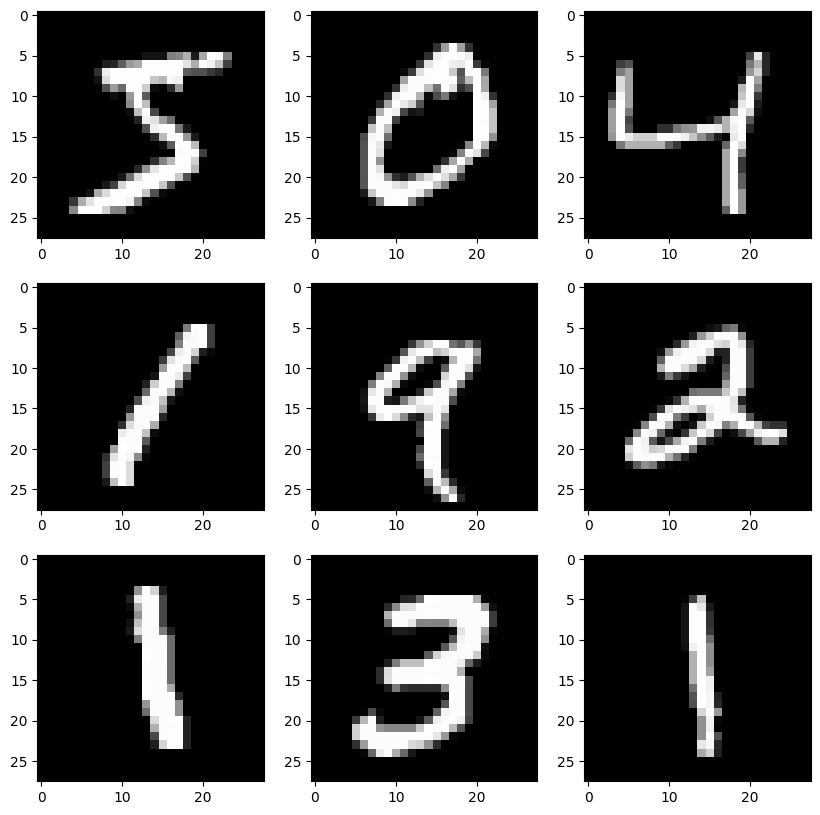

In [14]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap="gray")
plt.show()

## Data Preprocessing

In [15]:
import numpy as np

In [16]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [19]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [18]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
xtrain.shape

(60000, 28, 28)

In [27]:
xtrain_scl.shape

(60000, 28, 28)

In [28]:
# Before passing the data to neural network model, expand the dimensions => (28,28,1)
xtrain_scl = np.expand_dims(xtrain_scl,-1)
xtest_scl = np.expand_dims(xtest_scl,-1)

## Multiclass classification where target features has numerous outputs. OneHotEncoding is not suitable.
to_categorical

In [20]:
from keras.utils import to_categorical

In [21]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [23]:
ytrain[0]

np.uint8(5)

In [24]:
ytrain[1]

np.uint8(0)

In [22]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [25]:
ytrain_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

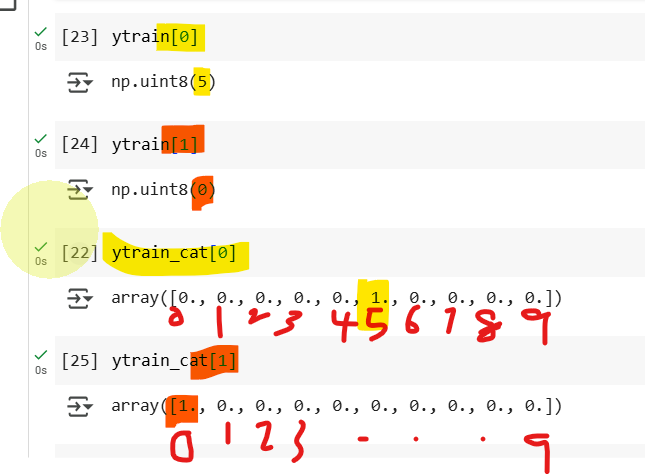

## Build the CNN
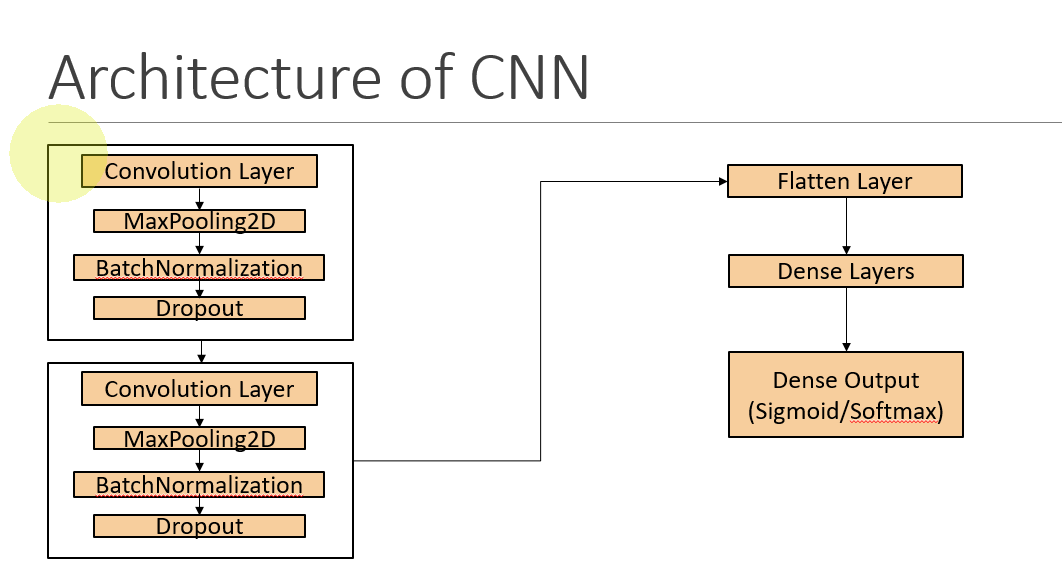

In [29]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,Convolution2D,MaxPooling2D,Flatten

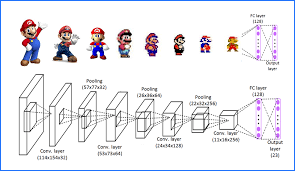

In [30]:
model = Sequential()

# Add the layer one by one
model.add(Input(shape=(28,28,1)))

# Add the Convolution layer
model.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))

# Add the Maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the Convolution layer
model.add(Convolution2D(64,kernel_size=(3,3),activation='relu'))

# Add the Maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the flatten layer
model.add(Flatten())

# Add the Dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(units=10,activation="softmax"))

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [34]:
hist = model.fit(xtrain_scl,ytrain_cat,validation_split=0.1,epochs=25,batch_size=32)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8524 - loss: 0.4740 - val_accuracy: 0.9828 - val_loss: 0.0615
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9726 - loss: 0.0892 - val_accuracy: 0.9852 - val_loss: 0.0494
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9786 - loss: 0.0675 - val_accuracy: 0.9890 - val_loss: 0.0378
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9867 - val_loss: 0.0392
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0513 - val_accuracy: 0.9917 - val_loss: 0.0328
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0452 - val_accuracy: 0.9907 - val_loss: 0.0345
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9874 - loss: 0.0423 - val_accuracy: 0.9927 - val_loss: 0.0273
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9879 - loss: 0.03

## Plot the learning curve

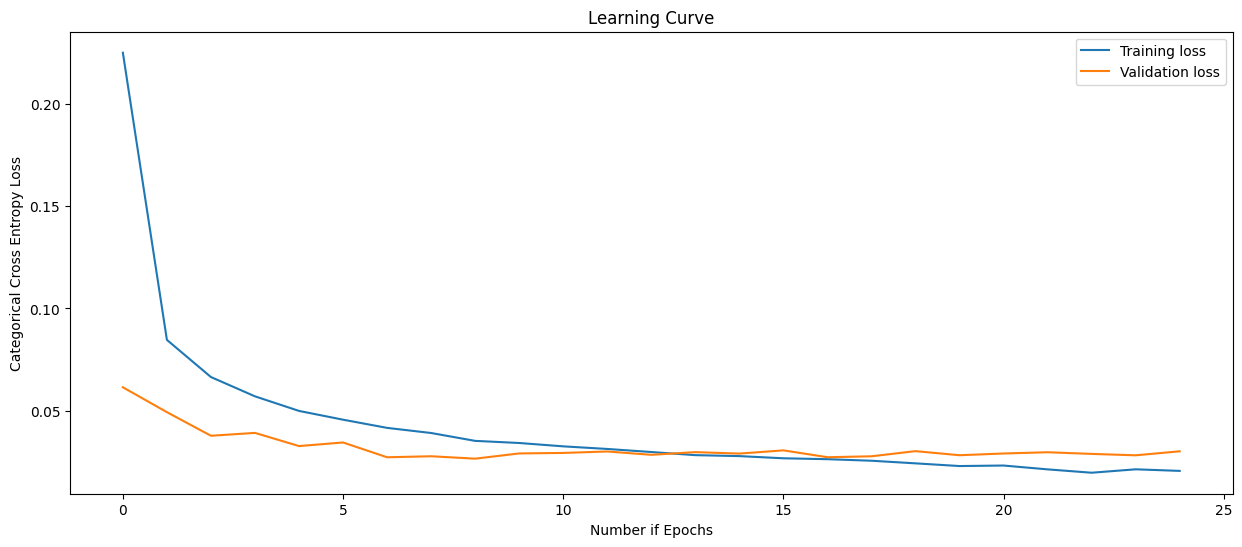

In [35]:
plt.figure(figsize=(15,6))
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Validation loss")
plt.xlabel("Number if Epochs")
plt.ylabel("Categorical Cross Entropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Model evaluation

In [36]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0038


[0.0069131506606936455, 0.998116672039032]

In [37]:
model.evaluate(xtest_scl,ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0282


[0.02486211620271206, 0.9927999973297119]

In [38]:
ypred_test = model.predict(xtest)
ypred_test[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
ytest[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
ypred_test2 = np.argmax(ypred_test,axis=1)
ypred_test2[:5]

array([7, 2, 8, 0, 4])

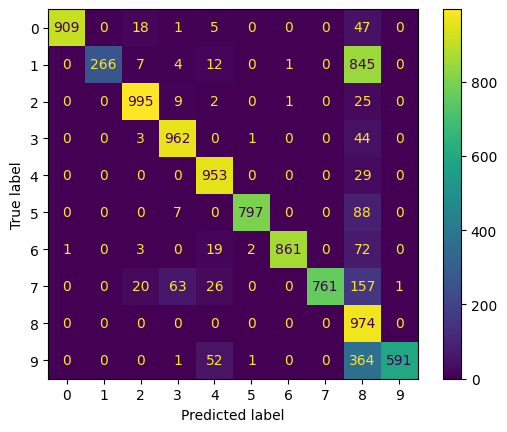

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test2)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       980
           1       1.00      0.23      0.38      1135
           2       0.95      0.96      0.96      1032
           3       0.92      0.95      0.94      1010
           4       0.89      0.97      0.93       982
           5       1.00      0.89      0.94       892
           6       1.00      0.90      0.95       958
           7       1.00      0.74      0.85      1028
           8       0.37      1.00      0.54       974
           9       1.00      0.59      0.74      1009

    accuracy                           0.81     10000
   macro avg       0.91      0.82      0.82     10000
weighted avg       0.91      0.81      0.81     10000



## Above model looks good with accuracy avg score >0.8

## Save the model

In [45]:
model.save("Handwritten_Digit.keras")

In [46]:
from keras.models import load_model

In [47]:
m = load_model('/content/Handwritten_Digit.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

## Out of sample predictions

In [48]:
import cv2

In [49]:
img = cv2.imread('/content/Example_3.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[255, 253, 255, 255, 252, 255, 252, 255, 253, 254, 255, 255, 251,
        255, 254, 252, 255, 255, 255, 254, 252, 255, 254, 255, 255, 255,
        255, 255],
       [254, 255, 253, 254, 254, 255, 255, 254, 255, 255, 251, 255, 254,
        254, 253, 255, 254, 255, 254, 255, 255, 254, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 254, 254, 255, 254, 253, 255, 253, 255, 255,
        254, 253, 252, 255, 255, 252, 251, 255, 251, 255, 254, 255, 255,
        255, 255],
       [252, 255, 254, 185,  33,   2,   0,   1,   0,   1,   0,  30, 152,
        255, 255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 254, 255,  33,   0,   0,   2,   2,   0,   0,   2,   1,   3,
          0,   0,   2,   0,  33, 151, 253, 253, 254, 255, 255, 255, 255,
        255, 255],
       [253, 254, 250, 138,   2,   0,   4,   0,   1,   0,   0,   0,   1,
          2,   4,   0,   2,   2,   0,   3,   1,   0,  35, 155, 255, 255,
        255, 255],
       [254, 255, 255, 247, 255, 252, 251, 255, 253, 255, 241, 102,   0,
          0,   2,   0,   0,   0,   1,   4,   0,   4,   0,   9, 255, 255,
        255, 255],
       [255, 255, 253, 255, 253, 255, 255, 255, 255, 255, 255, 251, 255,
        255, 254, 254, 245,  99,   0,   0,   2,   0,   0,   2, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 252,
        255, 255, 253, 181,  32,   1,   0,   1,   0,   1, 104, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255,
        253, 254, 164,  16,   0,   1,   1,   0, 105, 253, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 252, 255, 252,
        185,  36,   0,   2,   1,   0,   0, 108, 255, 246, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 254, 255, 180,
         14,   0,   1,   0,   0, 105, 255, 253, 248, 255, 252, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 253, 180,  17,
          3,   3,   0,  89, 245, 255, 255, 254, 255, 255, 252, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 183,  35,   2,   0,
          1,   0,   0,   2,  29, 158, 254, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254,  32,   0,   3,   2,
          0,   4,   2,   0,   1,   9, 158, 255, 252, 255, 250, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254, 134,   3,   0,   0,
          3,   0,   0,   0,   0,   0,  10, 255, 253, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 254, 255, 255, 252, 255, 253, 255, 255, 252, 255,
        255, 255, 255, 136,   0,   4,   0, 254, 255, 253, 255, 255, 255,
        255, 255],
       [252, 255, 255, 252, 255, 255, 255, 255, 255, 255, 250, 255, 255,
        254, 253, 255, 254,   0,   0,   2, 255, 252, 255, 255, 255, 255,
        255, 255],
       [255, 255, 253, 255, 255, 252, 254, 255, 254, 253, 255, 254, 253,
        252, 255, 254, 254,   4,   5,   0, 251, 253, 255, 255, 255, 255,
        255, 255],
       [255, 249, 255, 253, 255, 255, 255, 253, 255, 255, 251, 255, 255,
        253, 255, 253, 156,   3,   0,   1, 255, 255, 254, 255, 255, 255,
        255, 255],
       [255, 255, 253, 255, 255, 251, 255, 255, 252, 255, 255, 255, 254,
        185,  30,   2,   0,   0,   1,   2, 255, 255, 253, 255, 255, 255,
        255, 255],
       [254, 255, 254, 255, 255, 255, 179,  33,   0,   0,   0,   0,   0,
          2,   0,   0,   2,   0,   1, 104, 255, 253, 255, 255, 255, 255,
        255, 255],
       [254, 255, 255, 251, 254, 253,  35,   0,   4,   0,   3,   0,   0,
          0,   3,   0,   0,  93, 243, 251, 255, 254, 254, 255, 255, 255,
        255, 255],
       [255, 255, 254, 255, 252, 253, 135,   0,   0,   1,   0,   2,   0,
          0,   0, 102, 255, 252, 255, 255, 252, 255, 255, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

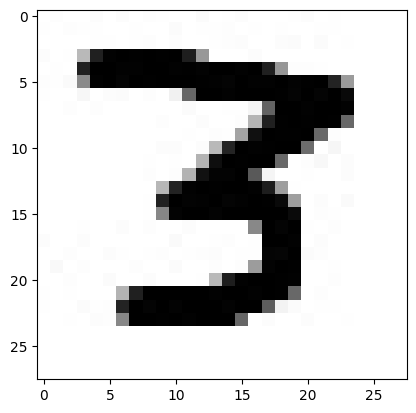

In [50]:
plt.imshow(img,cmap="gray")

In [51]:
img_scl = img.astype('float32')/255

In [52]:
img_scl

array([[1.        , 0.99215686, 1.        , 1.        , 0.9882353 ,
        1.        , 0.9882353 , 1.        , 0.99215686, 0.99607843,
        1.        , 1.        , 0.9843137 , 1.        , 0.99607843,
        0.9882353 , 1.        , 1.        , 1.        , 0.99607843,
        0.9882353 , 1.        , 0.99607843, 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.99607843, 1.        , 0.99215686, 0.99607843, 0.99607843,
        1.        , 1.        , 0.99607843, 1.        , 1.        ,
        0.9843137 , 1.        , 0.99607843, 0.99607843, 0.99215686,
        1.        , 0.99607843, 1.        , 0.99607843, 1.        ,
        1.        , 0.99607843, 0.99607843, 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99607843,
        0.99607843, 1.        , 0.99607843, 0.99215686, 1.        ,
        0.99215686, 1.        , 1.        , 0.99607843, 0.99215686,
        0.9882353 , 1.    

In [56]:
img_scl = img_scl.reshape(1,28,28,1)

In [57]:
prob = model.predict(img_scl)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


array([[3.0734533e-01, 7.0486672e-13, 1.3298191e-01, 3.3702111e-01,
        7.0833089e-06, 2.2237997e-01, 2.9582683e-09, 9.7070385e-10,
        2.6427355e-04, 2.8254013e-07]], dtype=float32)

In [58]:
pred = np.argmax(prob,axis=1)
pred

array([3])

## Write a function that reads the images and gives the predicted output

In [59]:
def predict_digit(model,img_path):
  img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  img_scl = img.astype('float32')/255
  img_scl = img_scl.reshape(1,28,28,1)

  prob = model.predict(img_scl)
  pred = np.argmax(prob,axis=1)

  return pred


In [61]:
handdigit_prediction = predict_digit(model,'/content/Example_7.jpg')
print(handdigit_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[7]


In [62]:
handdigit_prediction = predict_digit(model,'/content/Example_9.jpg')
print(handdigit_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[2]
